<a href="https://colab.research.google.com/github/Ami1ra1/projects/blob/main/qvi_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_excel("QVI_transaction_data.xlsx")



In [ ]:
df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
df.shape


(264836, 8)

In [ ]:
df.columns


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
df['TXN_ID'].nunique()

263127

In [ ]:
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
df.isna().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
#show
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

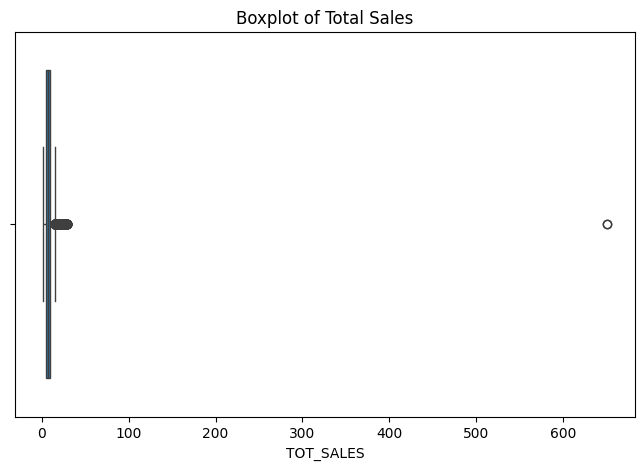

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Boxplot لاكتشاف القيم المتطرفة في إجمالي المبيعات
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TOT_SALES'])
plt.title("Boxplot of Total Sales")
plt.show()

#ازالة القيم المتطرفة
q1 = df['TOT_SALES'].quantile(0.25)
q3 = df['TOT_SALES'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['TOT_SALES'] >= lower_bound) & (df['TOT_SALES'] <= upper_bound)]


In [ ]:
import re

# استخراج حجم العبوة (الوزن بالجرام)
df['PACKAGE_SIZE'] = df['PROD_NAME'].apply(lambda x: re.findall(r'(\d+g)', x)[0] if re.findall(r'(\d+g)', x) else 'Unknown')

# استخراج اسم العلامة التجارية
df['BRAND'] = df['PROD_NAME'].apply(lambda x: x.split()[0])  # أول كلمة غالبًا تكون العلامة التجارية

# عرض البيانات بعد استخراج الميزات الجديدة
print(df[['PROD_NAME', 'PACKAGE_SIZE', 'BRAND']].head())


                                  PROD_NAME PACKAGE_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g         175g  Natural
1                  CCs Nacho Cheese    175g         175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g         170g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         150g   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g         300g      Old


In [ ]:
import re

# استخراج حجم العبوة بالجرامات (g)
df['PACKAGE_SIZE'] = df['PROD_NAME'].apply(lambda x: re.search(r'(\d{2,4}g)', x).group(1) if re.search(r'(\d{2,4}g)', x) else 'Unknown')

# استخراج العلامة التجارية (أول كلمة قبل أي كلمة مثل 'Chips' أو 'Tortilla' وما شابه)
def extract_brand(name):
    name_parts = name.split()
    common_words = ['Chips', 'Crinkle', 'Cut', 'Tortilla', 'Chps', 'Dip', 'Salsa', 'Company', 'Compny']
    for part in name_parts:
        if part not in common_words:
            return part
    return name_parts[0]  # الاحتفاظ بالكلمة الأولى إذا لم نجد تطابقًا آخر

df['BRAND'] = df['PROD_NAME'].apply(extract_brand)

# عرض التصحيح الجديد
print(df[['PROD_NAME', 'PACKAGE_SIZE', 'BRAND']].head())


                                  PROD_NAME PACKAGE_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g         175g  Natural
1                  CCs Nacho Cheese    175g         175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g         170g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         150g   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g         300g      Old


BRAND
Kettle        387066.20
Smiths        208994.70
Doritos       200234.20
Pringles      176730.50
Old            89958.90
Thins          88423.50
Twisties       80828.40
Tostitos       79239.60
Infuzions      75863.80
Cobs           70148.00
RRD            64744.50
Tyrrells       51387.00
Grain          42922.80
Cheezels       39591.00
Dorito         38918.75
WW             35889.50
Natural        34077.00
Red            30091.50
Infzns         22697.40
CCs            18078.90
Cheetos        16868.00
Smith          14583.40
Woolworths     13454.10
GrnWves         8521.90
NCC             8001.00
French          7929.00
Burger          6831.00
Snbts           5076.20
Sunbites        4600.20
Name: TOT_SALES, dtype: float64


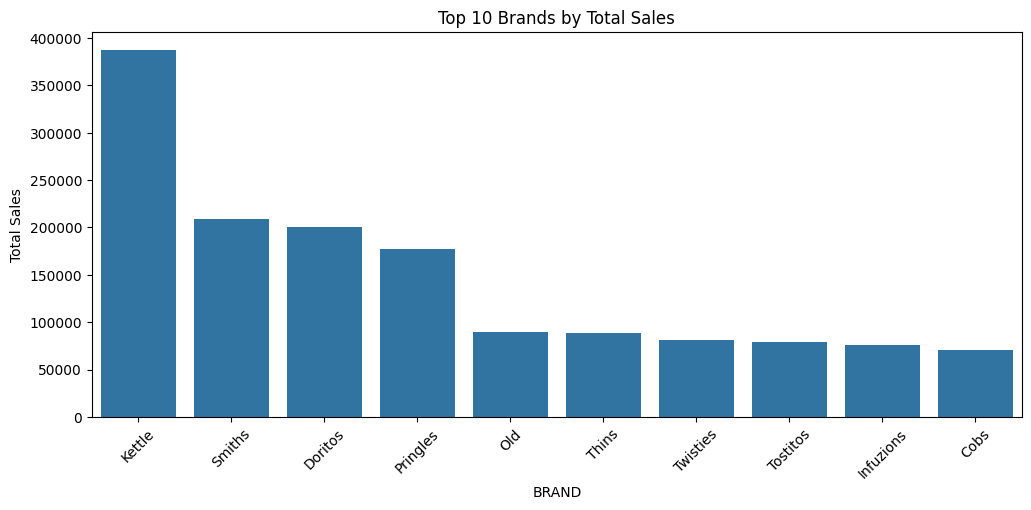

PACKAGE_SIZE
175g       473799.40
150g       295243.60
134g       176730.50
110g       161857.20
170g       146052.60
330g       135483.30
300g       112504.40
165g       100890.20
380g        74826.15
270g        54942.40
Unknown     37231.80
135g        25972.80
250g        25886.00
210g        21664.80
200g        16007.50
190g        14396.40
160g        10647.60
90g          9676.40
180g         8521.90
70g          6852.00
220g         6831.00
125g         5733.00
Name: TOT_SALES, dtype: float64


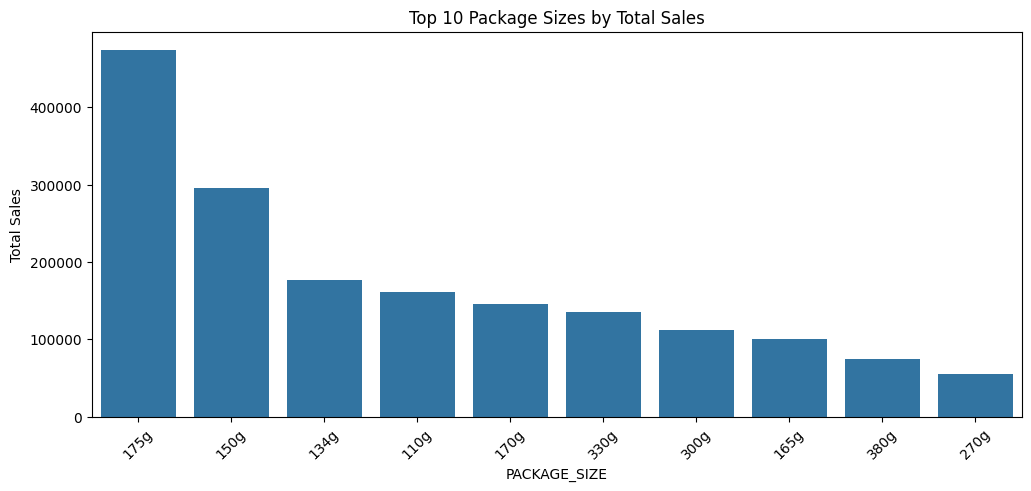

In [ ]:
# تحليل توزيع الإنفاق حسب العلامة التجارية
brand_sales = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)
print(brand_sales)

# رسم مخطط يوضح إنفاق العملاء حسب العلامة التجارية
plt.figure(figsize=(12, 5))
sns.barplot(x=brand_sales.index[:10], y=brand_sales.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Total Sales")
plt.ylabel("Total Sales")
plt.show()

# تحليل توزيع الإنفاق حسب حجم العبوة
package_sales = df.groupby('PACKAGE_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)
print(package_sales)

# رسم مخطط يوضح إنفاق العملاء حسب حجم العبوة
plt.figure(figsize=(12, 5))
sns.barplot(x=package_sales.index[:10], y=package_sales.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Package Sizes by Total Sales")
plt.ylabel("Total Sales")
plt.show()


BRAND
Kettle       387066.2
Smiths       208994.7
Doritos      200234.2
Pringles     176730.5
Old           89958.9
Thins         88423.5
Twisties      80828.4
Tostitos      79239.6
Infuzions     75863.8
Cobs          70148.0
Name: TOT_SALES, dtype: float64


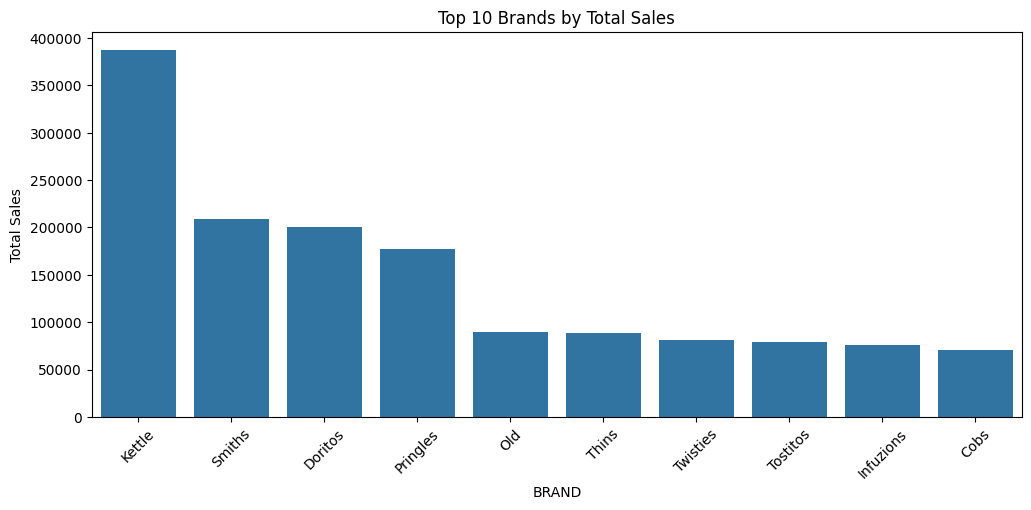

In [ ]:
# إجمالي المبيعات لكل علامة تجارية
brand_sales = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

# عرض أعلى 10 علامات تجارية من حيث المبيعات
print(brand_sales.head(10))

# رسم مخطط بياني
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x=brand_sales.index[:10], y=brand_sales.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Total Sales")
plt.ylabel("Total Sales")
plt.show()


count    72588.000000
mean         3.640505
std          2.625903
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         18.000000
Name: TXN_ID, dtype: float64


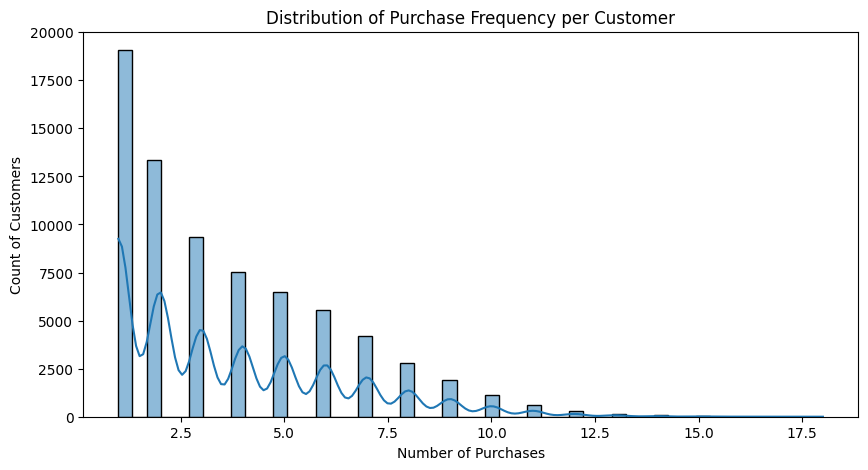

In [ ]:
# عدد عمليات الشراء لكل عميل
customer_purchases = df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count()

# توزيع العملاء حسب عدد عمليات الشراء
print(customer_purchases.describe())

# رسم التوزيع
plt.figure(figsize=(10, 5))
sns.histplot(customer_purchases, bins=50, kde=True)
plt.title("Distribution of Purchase Frequency per Customer")
plt.xlabel("Number of Purchases")
plt.ylabel("Count of Customers")
plt.show()


In [ ]:

df = pd.read_csv("QVI_purchase_behaviour.csv")



In [ ]:
df.shape

(72637, 3)

In [ ]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [ ]:
df.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
df.duplicated().sum()

0

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


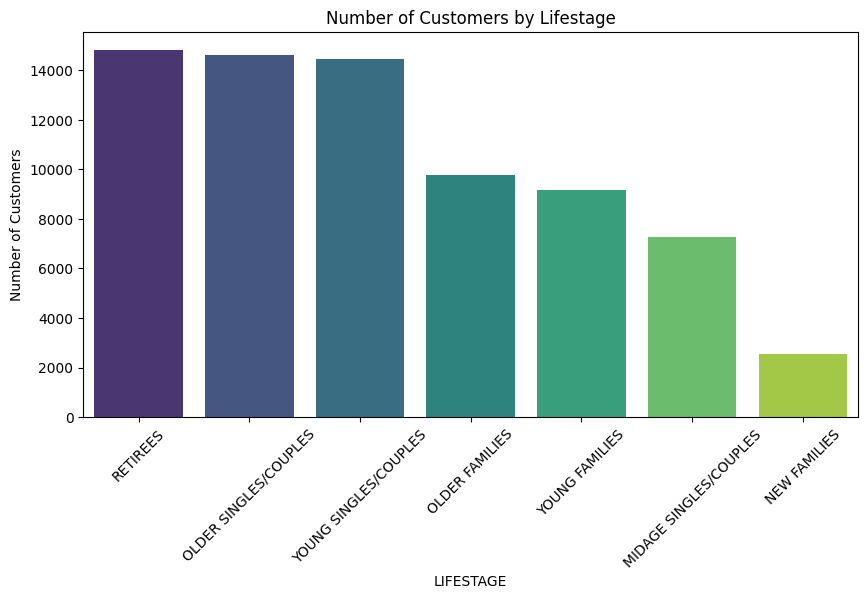

In [ ]:
# حساب عدد العملاء في كل مرحلة حياة
lifestage_count = df['LIFESTAGE'].value_counts()

# عرض النتائج
print(lifestage_count)

# رسم مخطط بياني
plt.figure(figsize=(10, 5))
sns.barplot(x=lifestage_count.index, y=lifestage_count.values, palette="viridis")
plt.title("Number of Customers by Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


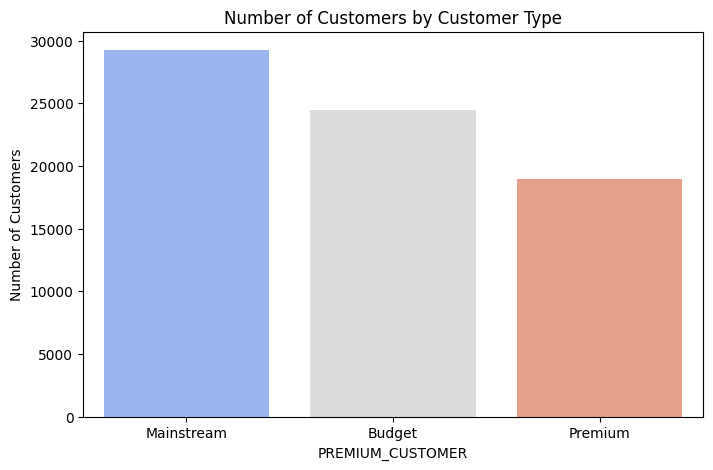

In [ ]:
# حساب عدد العملاء في كل فئة (Premium, Mainstream, Budget)
customer_type_count = df['PREMIUM_CUSTOMER'].value_counts()

# عرض النتائج
print(customer_type_count)

# رسم المخطط البياني
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_type_count.index, y=customer_type_count.values, palette="coolwarm")
plt.title("Number of Customers by Customer Type")
plt.ylabel("Number of Customers")
plt.show()


PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1504        3340     2431
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4675        2831     2274
OLDER SINGLES/COUPLES     4929        4930     4750
RETIREES                  4454        6479     3872
YOUNG FAMILIES            4017        2728     2433
YOUNG SINGLES/COUPLES     3779        8088     2574


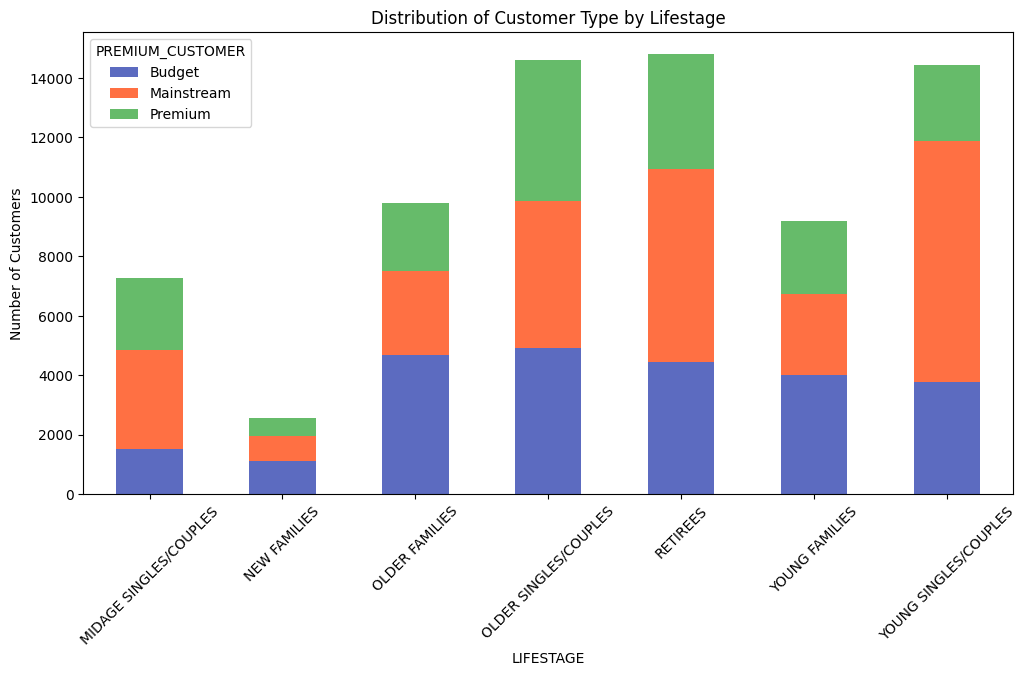

In [ ]:
# حساب توزيع العملاء حسب مرحلة الحياة ونوع العميل
lifestage_customer_type = pd.crosstab(df['LIFESTAGE'], df['PREMIUM_CUSTOMER'])

# عرض النتائج
print(lifestage_customer_type)

# رسم المخطط البياني
lifestage_customer_type.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#5C6BC0', '#FF7043', '#66BB6A'])
plt.title("Distribution of Customer Type by Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

# البيانات التي تم استخدامها في التحليل
lifestage_sales = {
    'RETIREES': 14805,
    'OLDER SINGLES/COUPLES': 14609,
    'YOUNG SINGLES/COUPLES': 14441,
    'OLDER FAMILIES': 9780,
    'YOUNG FAMILIES': 9178,
    'MIDAGE SINGLES/COUPLES': 7275,
    'NEW FAMILIES': 2549
}

premium_customer_sales = {
    'Mainstream': 29245,
    'Budget': 24470,
    'Premium': 18922
}

# حفظ التقرير كـ PDF
pdf = PdfPages("customer_analysis_report.pdf")

# رسم بياني لتوزيع العملاء حسب مرحلة الحياة (LIFESTAGE)
plt.figure()
plt.bar(lifestage_sales.keys(), lifestage_sales.values(), color='lightblue')
plt.title("Distribution of Customers by Life Stage")
plt.xlabel("Life Stage")
plt.ylabel("Number of Customers")
pdf.savefig()
plt.close()

# رسم بياني لتوزيع العملاء حسب نوع العميل (PREMIUM_CUSTOMER)
plt.figure()
plt.bar(premium_customer_sales.keys(), premium_customer_sales.values(), color='salmon')
plt.title("Distribution of Customers by Premium Status")
plt.xlabel("Premium Status")
plt.ylabel("Number of Customers")
pdf.savefig()
plt.close()

# تقرير ملخص للبيانات
summary = """
Customer Analysis Report

1. Distribution of Customers by Life Stage:
    - The largest group of customers is RETIREES, followed by OLDER SINGLES/COUPLES and YOUNG SINGLES/COUPLES.
    - NEW FAMILIES represent the smallest group.

2. Distribution of Customers by Premium Status:
    - Mainstream customers make up the largest segment, followed by Budget and Premium customers.
    - Premium customers represent the smallest group but tend to spend more.

Recommendations:
    - Focus on promoting products to Mainstream customers with reasonable pricing.
    - Target Premium customers with high-quality offerings and loyalty programs.
    - Develop targeted campaigns for Budget customers to increase spending.

End of Report
"""

# حفظ تقرير النص
plt.figure()
plt.text(0.1, 0.5, summary, fontsize=12, wrap=True)
plt.axis('off')
pdf.savefig()
plt.close()

# إغلاق ملف PDF بعد الانتهاء
pdf.close()

# رسالة تأكيد
print("تم حفظ التقرير كـ PDF بنجاح!")



تم حفظ التقرير كـ PDF بنجاح!


In [ ]:
from google.colab import files
files.download("customer_analysis_report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>